# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Jawab**

**1. Sumber Dataset**

*   data set diperoleh dari kaggle  https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv


**2. Ketentuan Dataset:**

*   **Tanpa label**: Dataset tidak boleh memiliki label atau kelas ✔
*   **Jumlah Baris**: Dataset yang saya gunakan mempunyai data 8129 baris ✔
*   **Tipe Data**: Mengandung data kategorikal dan numerikal ✔


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [620]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math  
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [656]:
CarDetails_df = pd.read_csv("Dataset_inisiasi.csv")
CarDetails_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [622]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Dari hasil output **df.info()**, dataset ini terdiri atas 8128 baris dan 13 kolom. Berikut adalah detail dari setiap kolom.

1. tipe data numerik (float64 & int64): year, selling_price, km_driven dan seats.

2. tipe data Kategorikal (object): name, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque.

## Mengecek Missing Values

In [623]:
total_rows = CarDetails_df.shape[0]
missing_data = CarDetails_df.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)

               Jumlah Data Hilang Persentase Data Hilang
name                            0                  0.00%
year                            0                  0.00%
selling_price                   0                  0.00%
km_driven                       0                  0.00%
fuel                            0                  0.00%
seller_type                     0                  0.00%
transmission                    0                  0.00%
owner                           0                  0.00%
mileage                       221                  2.72%
engine                        221                  2.72%
max_power                     215                  2.65%
torque                        222                  2.73%
seats                         221                  2.72%


In [624]:
# Mengecek jumlah data duplikat
duplicate_count = CarDetails_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 1202


In [625]:
CarDetails_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


**Insight**

- Saat memeriksa **missing value** ternyata banyak missing values pada beberapa kolom utama yaitu : mileage, engine, max_power, torque dan seats

- Jumlah data duplikat: 1202

- Berdasarkan hasil statistik deskriptif yang ditampilkan oleh df.describe(), dapat dilihat beberapa informasi penting mengenai kolom-kolom numerik dalam dataset.

1. Mayoritas mobil dalam dataset diproduksi antara tahun 2011-2017, menunjukkan bahwa sebagian besar data berasal dari mobil yang masih relatif baru.

2. Harga jual bervariasi secara signifikan, dengan rentang yang sangat luas dari puluhan ribu hingga jutaan.

3. Jarak tempuh juga sangat bervariasi, menunjukkan bahwa dataset mencakup mobil dengan kondisi yang sangat beragam (baik baru maupun bekas pakai dalam waktu lama).

4. Sebagian besar mobil memiliki 5 kursi, yang menunjukkan bahwa mayoritas mobil dalam dataset adalah jenis sedan atau SUV standar.

## Analisis Distribusi dan Korelasi

In [626]:
print(CarDetails_df.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


dari struktur data yang ditampilkan, dataset ini terdiri dari berbagai jenis fitur, termasuk kategori (object), numerik diskrit (int64), dan numerik kontinu (float64). name, fuel, seller_type, transmission, owner, mileage, engine, max_power dan torque bersifat kategorikal atau object. Year, selling_price, dan km_driven merupakan data numerik yang bisa digunakan sebagai variabel input dalam analisis prediktif atau clustering.

In [627]:
numerical_features = [col for col in CarDetails_df.columns if CarDetails_df[col].dtype in ['int64', 'float64']]

print(CarDetails_df[numerical_features].describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


dataset ini berisi 8.128 entri dengan variabel utama seperti tahun produksi, harga jual, jarak tempuh (km_driven), dan jumlah kursi (seats). rata-rata tahun produksi mobil adalah 2013, dengan rentang dari 1983 hingga 2020. Harga jual bervariasi secara signifikan, mulai dari 29.999.000 hingga 10.000.000.000, dengan harga median sekitar 450.000.000.

Jarak tempuh mobil juga sangat bervariasi, dengan rata-rata 69.819 km dan maksimum 2.360.457 km, menunjukkan adanya beberapa outlier. Untuk jumlah kursi, mayoritas mobil memiliki 5 kursi, meskipun ada beberapa model dengan kapasitas hingga 14 kursi.

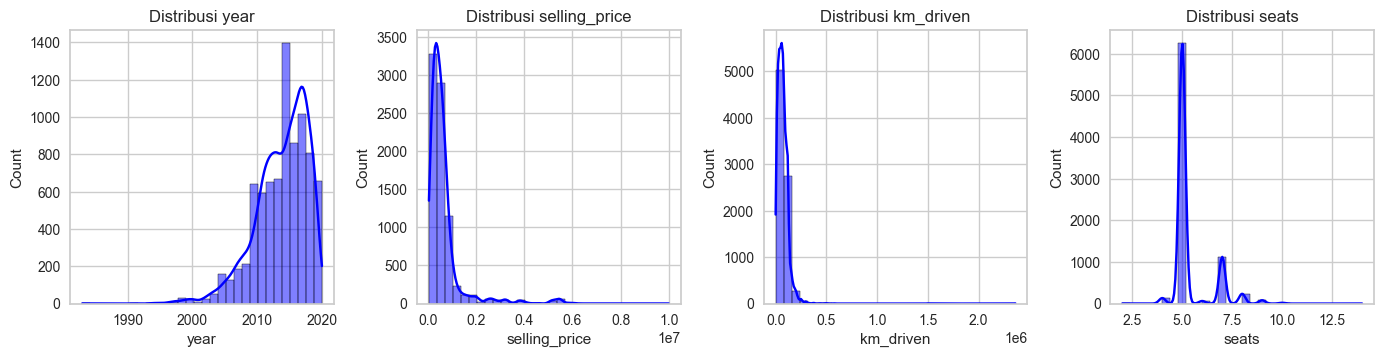

In [628]:
# Menentukan kolom dengan kategori (numerik)
num_features = CarDetails_df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(CarDetails_df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

grafik histogram menunjukkan distribusi tahun produksi kendaraan dengan mayoritas berada antara tahun 2010–2020. Ini mengindikasikan bahwa sebagian besar mobil dalam dataset tergolong baru. harga jual kendaraan menunjukkan distribusi yang sangat tidak merata, dengan mayoritas harga berada di rentang bawah, tetapi ada beberapa kendaraan dengan harga yang jauh lebih tinggi, menandakan adanya outlier. kilometer tempuh kendaraan cenderung rendah pada sebagian besar data, dengan beberapa outlier yang memiliki jarak tempuh sangat tinggi. kapasitas kursi kendaraan didominasi oleh mobil dengan 5 kursi, sementara kendaraan dengan lebih dari 5 kursi merupakan minoritas.

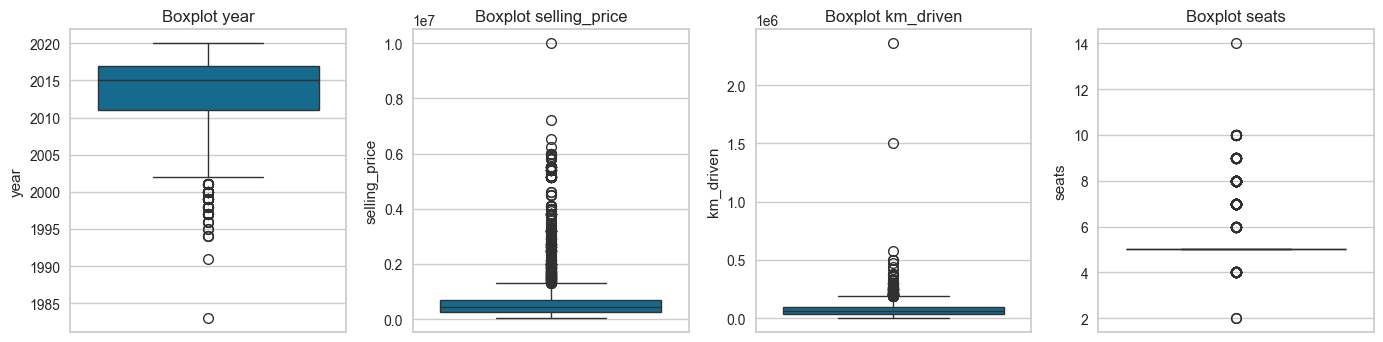

In [629]:
# Membuat visualisasi boxplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=CarDetails_df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

tahun kendaraan sebelum 2005 memiliki jumlah yang sangat sedikit dan dianggap sebagai outlier. harga jual memiliki beberapa kendaraan dengan nilai ekstrem yang jauh lebih tinggi dari kebanyakan kendaraan lain dalam dataset. kilometer tempuh juga menunjukkan keberadaan kendaraan yang memiliki jarak tempuh jauh di atas rata-rata.

## Visualisasi Data

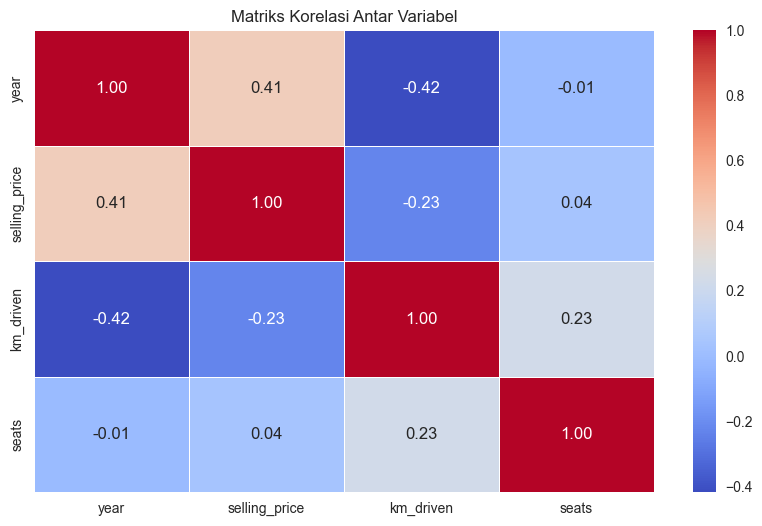

In [630]:

# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

heatmap korelasi menunjukkan bahwa terdapat korelasi positif antara year dan selling_price (0.41), menandakan bahwa kendaraan yang lebih baru cenderung memiliki harga jual lebih tinggi. Sebaliknya, terdapat korelasi negatif antara km_driven dan selling_price (-0.23), yang berarti kendaraan dengan jarak tempuh lebih tinggi cenderung memiliki harga jual yang lebih rendah.

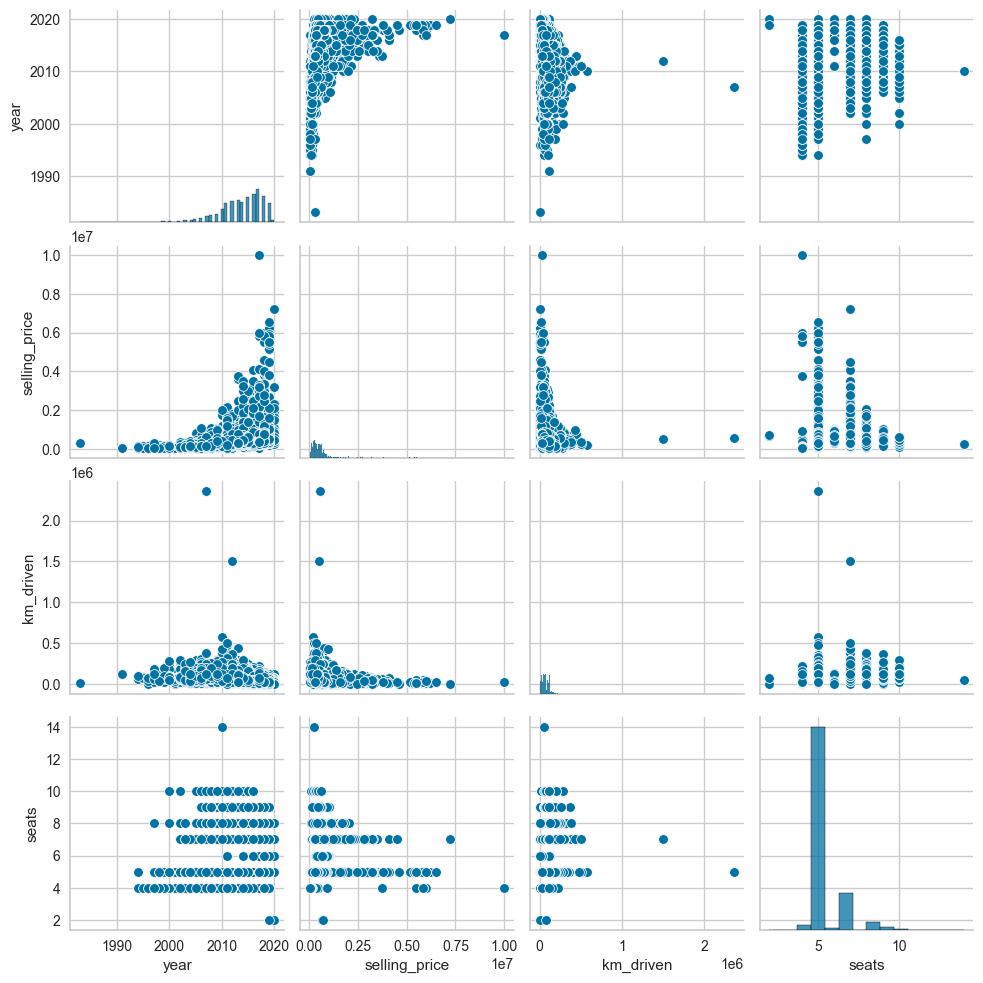

In [631]:

# Menentukan fitur numerik dalam dataset
num_features = CarDetails_df.select_dtypes(include=['number'])  # Ubah menjadi DataFrame
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

dari scatter plot antar-variabel, terlihat bahwa hubungan antara selling_price dan year menunjukkan tren positif, dengan kendaraan yang lebih baru cenderung memiliki harga yang lebih tinggi. Sementara itu, hubungan antara selling_price dan km_driven menunjukkan pola sebaliknya, di mana kendaraan dengan kilometer tempuh tinggi cenderung memiliki harga yang lebih rendah. Scatter plot juga mengonfirmasi bahwa mayoritas kendaraan memiliki 5 kursi, dengan hanya sedikit kendaraan yang memiliki lebih dari 5 kursi.

heatmap korelasi di atas menunjukkan hubungan antar variabel dalam dataset CarDetails_df. Terdapat korelasi kuat antara engine dan torque (0.73), serta mileage dan max_power (0.52), yang mengindikasikan bahwa mesin dengan kapasitas lebih besar cenderung memiliki torsi lebih tinggi, sementara daya maksimum juga berhubungan dengan efisiensi bahan bakar. Korelasi lainnya relatif rendah, seperti antara transmission dan max_power (0.21), menunjukkan hubungan lemah antara jenis transmisi dan tenaga mesin. Secara keseluruhan, tidak ada korelasi yang sangat tinggi selain yang disebutkan, menandakan bahwa sebagian besar variabel dalam dataset tidak terlalu bergantung satu sama lain.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus atau Menangani Data Kosong (Missing Values)


In [632]:
# Mengisi nilai NaN dengan nilai yang paling sering muncul (modus)
for col in ['mileage', 'engine', 'max_power']:
    CarDetails_df[col].fillna(CarDetails_df[col].mode()[0], inplace=True)

# Menghapus kolom yang tidak diperlukan dalam clustering
# CarDetails_df.drop(columns=["torque", "name", "seats", 'year'], inplace=True)
CarDetails_df.drop(columns=['torque', 'name','seats'], inplace=True)

total_rows = CarDetails_df.shape[0]
missing_data = CarDetails_df.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)


               Jumlah Data Hilang Persentase Data Hilang
year                            0                  0.00%
selling_price                   0                  0.00%
km_driven                       0                  0.00%
fuel                            0                  0.00%
seller_type                     0                  0.00%
transmission                    0                  0.00%
owner                           0                  0.00%
mileage                         0                  0.00%
engine                          0                  0.00%
max_power                       0                  0.00%


C:\Users\User\AppData\Local\Temp\ipykernel_15292\427754297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CarDetails_df[col].fillna(CarDetails_df[col].mode()[0], inplace=True)



1. missing value
    - mengisi **missing value** pada beberapa kolom utama yaitu : mileage, engine dan max_power
    - mengahpus kolom torque karena memiliki teks yang bervariasi
    - menghapus kolom seats karena rentang ilai yang sangat kecil

## Menghapus Data Duplikat


In [633]:
print("Jumlah data duplikat: ", CarDetails_df.duplicated().sum())
print(f"Jumlah data sebelum duplikat dihapus: {CarDetails_df.shape}")
CarDetails_df.drop_duplicates(inplace=True)
print(f"Jumlah data setelah duplikat dihapus: {CarDetails_df.shape}")


Jumlah data duplikat:  1222
Jumlah data sebelum duplikat dihapus: (8128, 10)
Jumlah data setelah duplikat dihapus: (6906, 10)


Jumlah data adalah 8128 data dari 11 fitur, terindikasi data duplikat sebanyak 1222. setelah dibersihkan data menjadi 6906


## Normalisasi atau Standarisasi Fitur 

In [634]:
numerical_features = CarDetails_df.select_dtypes(include=['int64', 'float64']).columns

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

data_minmax = CarDetails_df.copy()
data_standard = CarDetails_df.copy()

data_minmax[numerical_features] = scaler_minmax.fit_transform(CarDetails_df[numerical_features])
data_standard[numerical_features] = scaler_standard.fit_transform(CarDetails_df[numerical_features])

print("Normalisasi dengan MinMaxScaler:")
print(data_minmax[numerical_features].head())
print("\nStandarisasi dengan StandardScaler:")
print(data_standard[numerical_features].head())

Normalisasi dengan MinMaxScaler:
       year  selling_price  km_driven
0  0.837838       0.042126   0.061640
1  0.837838       0.034102   0.050837
2  0.621622       0.012839   0.059310
3  0.729730       0.019559   0.053803
4  0.648649       0.010030   0.050837

Standarisasi dengan StandardScaler:
       year  selling_price  km_driven
0  0.143039      -0.129605   1.225184
1  0.143039      -0.283346   0.788227
2 -1.817421      -0.690759   1.130939
3 -0.837191      -0.562001   0.908176
4 -1.572363      -0.744569   0.788227


In [635]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           6906 non-null   int64 
 1   selling_price  6906 non-null   int64 
 2   km_driven      6906 non-null   int64 
 3   fuel           6906 non-null   object
 4   seller_type    6906 non-null   object
 5   transmission   6906 non-null   object
 6   owner          6906 non-null   object
 7   mileage        6906 non-null   object
 8   engine         6906 non-null   object
 9   max_power      6906 non-null   object
dtypes: int64(3), object(7)
memory usage: 593.5+ KB


In [636]:
data_minmax[numerical_features] = scaler_minmax.inverse_transform(data_minmax[numerical_features])
data_standard[numerical_features] = scaler_standard.inverse_transform(data_standard[numerical_features])

# Tampilkan data setelah inversi untuk memastikan nilai kembali normal
print("\nData setelah inversi (MinMaxScaler):")
print(data_minmax[numerical_features].head())

print("\nData setelah inversi (StandardScaler):")
print(data_standard[numerical_features].head())


Data setelah inversi (MinMaxScaler):
     year  selling_price  km_driven
0  2014.0       450000.0   145500.0
1  2014.0       370000.0   120000.0
2  2006.0       158000.0   140000.0
3  2010.0       225000.0   127000.0
4  2007.0       130000.0   120000.0

Data setelah inversi (StandardScaler):
     year  selling_price  km_driven
0  2014.0       450000.0   145500.0
1  2014.0       370000.0   120000.0
2  2006.0       158000.0   140000.0
3  2010.0       225000.0   127000.0
4  2007.0       130000.0   120000.0


melakukan normalisasi Min-Max Scaling atau Z-Score Scaling pada fitur numerik seperti selling_price, km_driven, mileage, engine, dan max_power agar semua fitur berada dalam skala yang sama.


## Deteksi dan Penanganan Outlier

In [637]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier pada semua fitur numerik
data_no_outliers = CarDetails_df.copy()
for col in numerical_features:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col)

print("Data setelah menghapus outlier:")
print(data_no_outliers.describe())

Data setelah menghapus outlier:
              year  selling_price      km_driven
count  6344.000000   6.344000e+03    6344.000000
mean   2013.517497   4.391814e+05   70305.460908
std       3.748016   2.496913e+05   39767.594034
min    2002.000000   3.150400e+04       1.000000
25%    2011.000000   2.450000e+05   40000.000000
50%    2014.000000   4.000000e+05   70000.000000
75%    2017.000000   6.000000e+05  100000.000000
max    2020.000000   1.225000e+06  190000.000000


<Figure size 1200x800 with 0 Axes>

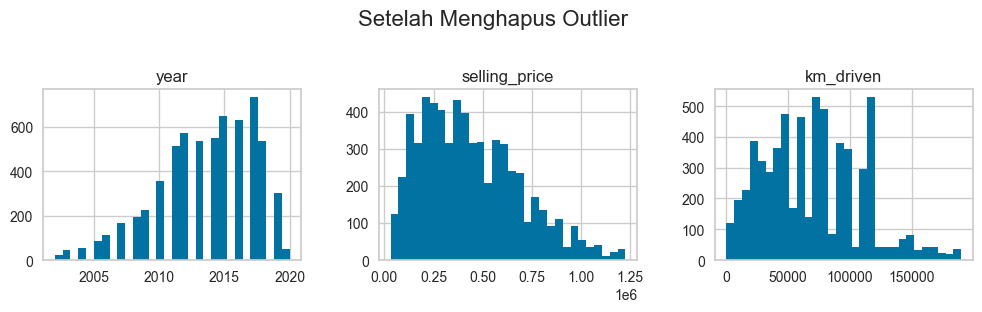

In [638]:
# Visualisasi distribusi setelah penanganan outlier
plt.figure(figsize=(12, 8))
data_no_outliers[numerical_features].hist(bins=30, figsize=(12, 8), layout=(3, 3))
plt.suptitle("Setelah Menghapus Outlier", fontsize=16)
plt.show()


sebelumnya terdeteksi outlier dalam fitur selling_price, km_driven, dan mileage dengan nilai yang extream ditangani dengan menggunakan winsorizing untuk membatasi outlier dengan nilai batas tertentu


## Encoding Data Kategorikal

In [639]:
CarDetails_df['mileage'] = CarDetails_df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
CarDetails_df['engine'] = CarDetails_df['engine'].str.extract('(\d+)').astype(float)
CarDetails_df['max_power'] = CarDetails_df['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)

CarDetails_df["transmission"] = CarDetails_df["transmission"].map({"Manual": 1, "Automatic": 2})
CarDetails_df["fuel"] = CarDetails_df["fuel"].map({"Diesel": 1, "Petrol": 2, "CNG": 3, "LPG": 4})


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_15292\2866836110.py:1: SyntaxWarning: invalid escape sequence '\d'
  CarDetails_df['mileage'] = CarDetails_df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_15292\2866836110.py:2: SyntaxWarning: invalid escape sequence '\d'
  CarDetails_df['engine'] = CarDetails_df['engine'].str.extract('(\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_15292\2866836110.py:3: SyntaxWarning: invalid escape sequence '\d'
  CarDetails_df['max_power'] = CarDetails_df['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)


In [640]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6906 non-null   int64  
 1   selling_price  6906 non-null   int64  
 2   km_driven      6906 non-null   int64  
 3   fuel           6906 non-null   int64  
 4   seller_type    6906 non-null   object 
 5   transmission   6906 non-null   int64  
 6   owner          6906 non-null   object 
 7   mileage        6906 non-null   float64
 8   engine         6906 non-null   float64
 9   max_power      6905 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 593.5+ KB


In [641]:
print("Jumlah nilai NaN sebelum penanganan:\n", CarDetails_df['max_power'].isna().sum())
CarDetails_df['max_power'].fillna(CarDetails_df['max_power'].mode()[0], inplace=True)
print("Jumlah nilai NaN setelah penanganan:\n", CarDetails_df['max_power'].isna().sum())


Jumlah nilai NaN sebelum penanganan:
 1
Jumlah nilai NaN setelah penanganan:
 0


C:\Users\User\AppData\Local\Temp\ipykernel_15292\334804499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CarDetails_df['max_power'].fillna(CarDetails_df['max_power'].mode()[0], inplace=True)


In [642]:
# One-Hot Encoding untuk kategori dengan sedikit nilai unik
low_cardinality_cols = [col for col in CarDetails_df.select_dtypes(include=['object']).columns if CarDetails_df[col].nunique() <= 10]
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = pd.DataFrame(encoder.fit_transform(CarDetails_df[low_cardinality_cols]), columns=encoder.get_feature_names_out(low_cardinality_cols), index=CarDetails_df.index)

# Label Encoding untuk kategori dengan banyak nilai unik
label_encoded = CarDetails_df.copy()
for col in CarDetails_df.select_dtypes(include=['object']).columns:
    if CarDetails_df[col].nunique() > 10:
        label_encoded[col] = LabelEncoder().fit_transform(CarDetails_df[col])

# Gabungkan hasil encoding
encoded_data = label_encoded.drop(columns=low_cardinality_cols).join(one_hot_encoded)

numerical_features = ["year", "selling_price", "km_driven","fuel","transmission", "mileage", "engine", "max_power"]
scaled_numerical = StandardScaler().fit_transform(CarDetails_df[numerical_features])

# Gabungkan fitur numerik & kategorikal yang sudah diproses
X = np.hstack((scaled_numerical, encoded_data.drop(columns=numerical_features).values))

# Hasil akhir
print(f"Shape of Processed Data: {X.shape}")
print("Sample Encoded Data:")
print(pd.DataFrame(X).head())

Shape of Processed Data: (6906, 14)
Sample Encoded Data:
         0         1         2         3         4         5         6   \
0  0.143039 -0.129605  1.225184 -0.872215 -0.303934  0.990525 -0.364442   
1  0.143039 -0.283346  0.788227 -0.872215 -0.303934  0.424100  0.149215   
2 -1.817421 -0.690759  1.130939  0.957529 -0.303934 -0.438070  0.147161   
3 -0.837191 -0.562001  0.908176 -0.872215 -0.303934  0.890272 -0.060357   
4 -1.572363 -0.744569  0.788227  0.957529 -0.303934 -0.839079 -0.261711   

         7    8    9    10   11   12   13  
0 -0.424978  1.0  0.0  0.0  0.0  0.0  0.0  
1  0.515337  1.0  0.0  0.0  1.0  0.0  0.0  
2 -0.297564  1.0  0.0  0.0  0.0  0.0  1.0  
3  0.084678  1.0  0.0  0.0  0.0  0.0  0.0  
4  0.027342  1.0  0.0  0.0  0.0  0.0  0.0  


Proses preprocessing pada dataset CarDetails_df dilakukan dengan dua metode encoding untuk variabel kategorikal: One-Hot Encoding untuk kategori dengan sedikit nilai unik dan Label Encoding untuk kategori dengan banyak nilai unik. Fitur numerik kemudian distandardisasi agar memiliki skala yang seragam. Setelah itu, hasil encoding dan scaling digabungkan, menghasilkan dataset dengan bentuk (6906, 14), siap digunakan untuk analisis atau pemodelan lebih lanjut.

## Binning (Pengelompokan Data)

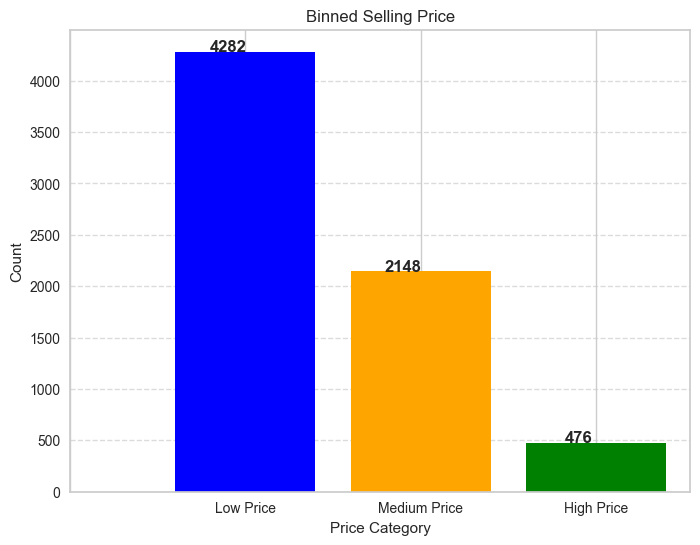

In [643]:
def categorize_price(price):
    if price <= 500000:
        return 1 
    elif 500000 < price <= 1000000:
        return 2 
    else:
        return 3 
CarDetails_df['price_category'] = CarDetails_df['selling_price'].apply(categorize_price).astype('int64')
price_bins = CarDetails_df['price_category'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(price_bins.index, price_bins.values, color=['blue', 'orange', 'green'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), 
             ha='center', fontsize=12, fontweight='bold')

# Label sumbu
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.title("Binned Selling Price")
plt.xticks(ticks=[0, 1, 2, 3], labels=['', 'Low Price', 'Medium Price', 'High Price'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**SELLING PRICE**

Grafik menunjukkan distribusi mobil berdasarkan kategori harga: 
- Low Price (≤ 500,000) 
- Medium Price (500,000 - 1,000,000)
- High Price (> 1,000,000)

Mayoritas mobil termasuk dalam kategori Low Price (4,282 unit), diikuti oleh Medium Price (2,148 unit), dan paling sedikit dalam High Price (476 unit). Ini menunjukkan bahwa sebagian besar mobil dalam dataset berada di kisaran harga rendah hingga menengah, yang dapat mencerminkan preferensi pasar atau ketersediaan mobil bekas dengan harga terjangkau.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

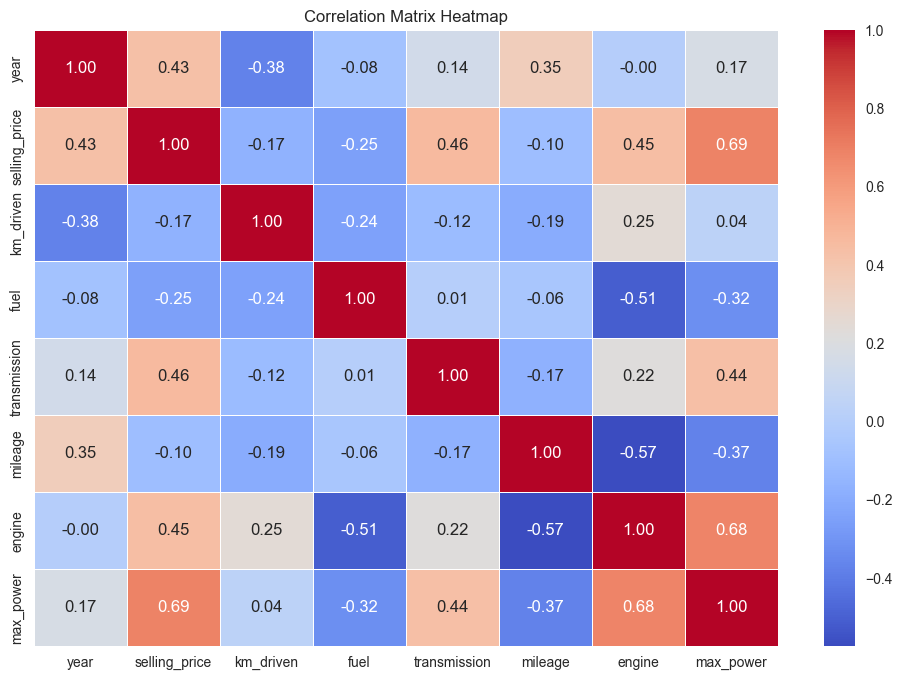

In [644]:
features = ["year", "selling_price", "km_driven" , "fuel" , "transmission", "mileage", "engine", "max_power"]
data_corr = CarDetails_df[features]

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [645]:
selected_features = ["engine", "mileage", "km_driven", "max_power", "transmission"]
data_selected = CarDetails_df[features]

scaler = MinMaxScaler()
Datascaled = scaler.fit_transform(data_selected)

data_selected.sample(10)

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power
5335,2015,401000,74000,1,1,24.40,1120.0,71.00
2936,2015,615000,32000,1,1,26.59,1248.0,74.00
6805,2016,290000,10000,2,1,25.17,799.0,53.30
2371,2019,860000,14317,2,1,14.23,1498.0,104.55
85,2016,315000,32000,2,1,24.70,796.0,47.30
6421,2020,265000,70000,2,1,21.79,998.0,67.05
748,2017,360000,50000,1,1,27.28,1047.0,69.00
3430,2013,459999,60000,1,1,21.27,1396.0,88.76
1934,2017,700000,50000,1,1,28.40,1248.0,74.02
2472,2015,1125000,70000,1,1,15.40,2179.0,120.00


Text(0.5, 1.0, 'Elbow Method')

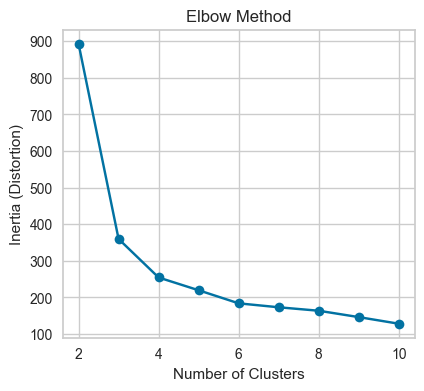

In [646]:
cluster_range = range(2, 11)  
inertia_values = []  
silhouette_scores = [] 


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=5, n_init="auto")
    labels = kmeans.fit_predict(Datascaled)
    
    inertia_values.append(kmeans.inertia_)
    
    # Simpan Silhouette Score
    silhouette_avg = silhouette_score(Datascaled, labels)
    silhouette_scores.append(silhouette_avg)

    # --- Visualisasi Elbow Method ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method")

dapat dilihat pada grafik elbow method dari :
- k = 2 ke 3 terjadi penurunan inertia yang tajam.

- k = 3 ke 4, inertia masih turun lumayan, tapi sudah mulai landai.

- k = 4 ke atas, penurunan makin datar (tidak signifikan lagi).

untuk menentukan elbow method saya menggunakan mengibaratkan seperti siku tangan, dengan artian method 4 jadi pilihan terbaik karena penurunan semakin signifikan

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

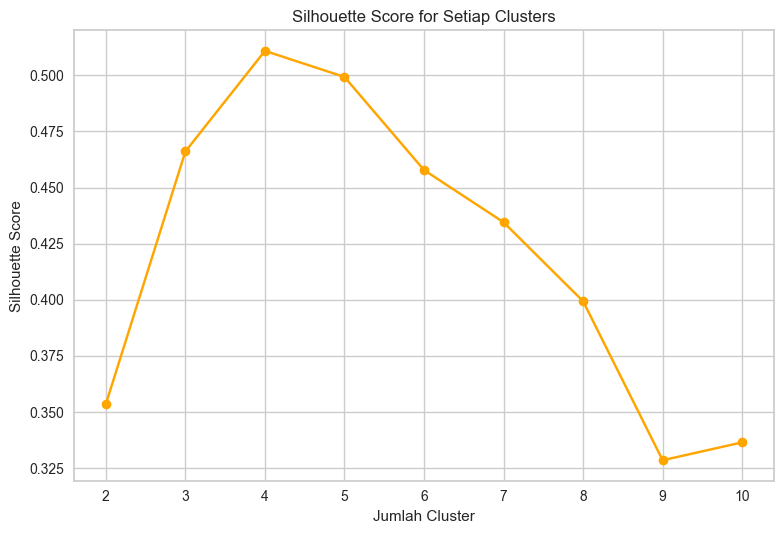

Cluster Optimal: 4


In [647]:
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="-", color="orange")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Setiap Clusters")

plt.tight_layout()
plt.show()

# Menentukan jumlah cluster optimal berdasarkan hasil
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Cluster Optimal: {optimal_k}")

In [648]:
print("\n--- K-Means Clustering ---")
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
labels_kmeans = kmeans.fit_predict(Datascaled)
silhouette_kmeans = silhouette_score(Datascaled, labels_kmeans)
print(f'Silhouette Score (KMeans, 4 clusters): {silhouette_kmeans:.2f}')

print("\n--- K-Means PCA ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Datascaled)

kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init="auto")
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
silhouette_kmeans_pca = silhouette_score(X_pca, labels_kmeans_pca)
print(f'Silhouette Score (KMeans with PCA, 4 clusters): {silhouette_kmeans_pca:.2f}')




--- K-Means Clustering ---
Silhouette Score (KMeans, 4 clusters): 0.51

--- K-Means PCA ---
Silhouette Score (KMeans with PCA, 4 clusters): 0.75


Berdasarkan analisis menggunakan metode Silhouette Score, jumlah cluster yang optimal untuk model K-Means Clustering adalah 4 cluster. nilai Silhouette Score menggunakan K-Means sebesar 0.51 yang terlihat hasil K-Means Clustering. setelah dilakukan reduksi dimensi menggunakan PCA (Principal Component Analysis), performa model meningkat secara signifikan. Dengan tetap menggunakan 4 cluster, Silhouette Score pada K-Means setelah PCA naik menjadi 0.75.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [649]:
selected_features = ["mileage", "engine", "max_power","km_driven", "transmission"]
fitur_selected = CarDetails_df[selected_features]

pca = PCA(n_components=2)
data_pca = pca.fit_transform(Datascaled)

kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init="auto")
labels_kmeans_pca = kmeans_pca.fit_predict(data_pca)
silhouette_kmeans_pca = silhouette_score(data_pca, labels_kmeans_pca)
print(f'Silhouette Score (KMeans PCA with 4 clusters): {silhouette_kmeans_pca:.2f}')

Silhouette Score (KMeans PCA with 4 clusters): 0.75


In [650]:
# Memasukkan hasil cluster ke dataset
data_selected.loc[:, 'Cluster'] = labels_kmeans_pca
data_selected.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_15292\261045638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.loc[:, 'Cluster'] = labels_kmeans_pca


,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,Cluster
2992,2014,225000,100000,2,1,19.49,1198.0,67.04,3
7998,2017,270000,35000,2,1,24.70,796.0,47.30,3
1594,2018,350000,30000,2,1,23.01,999.0,67.00,3
2412,2005,50000,90000,2,1,15.40,1590.0,94.00,3
4687,2015,265000,48000,2,1,24.70,796.0,47.30,3
1406,2012,400000,100000,1,1,19.30,1248.0,73.90,1
803,2015,210000,40000,2,1,21.10,814.0,55.20,3
4853,2013,200000,68697,2,1,21.10,814.0,55.20,3
8006,2017,660000,56000,1,1,25.20,1248.0,74.00,1
3746,2015,240000,80000,2,1,23.95,998.0,67.05,3


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [651]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6906 non-null   int64  
 1   selling_price   6906 non-null   int64  
 2   km_driven       6906 non-null   int64  
 3   fuel            6906 non-null   int64  
 4   seller_type     6906 non-null   object 
 5   transmission    6906 non-null   int64  
 6   owner           6906 non-null   object 
 7   mileage         6906 non-null   float64
 8   engine          6906 non-null   float64
 9   max_power       6906 non-null   float64
 10  price_category  6906 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 647.4+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_15292\2083236492.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clusters, y=jumlah_cluster, palette=warna)


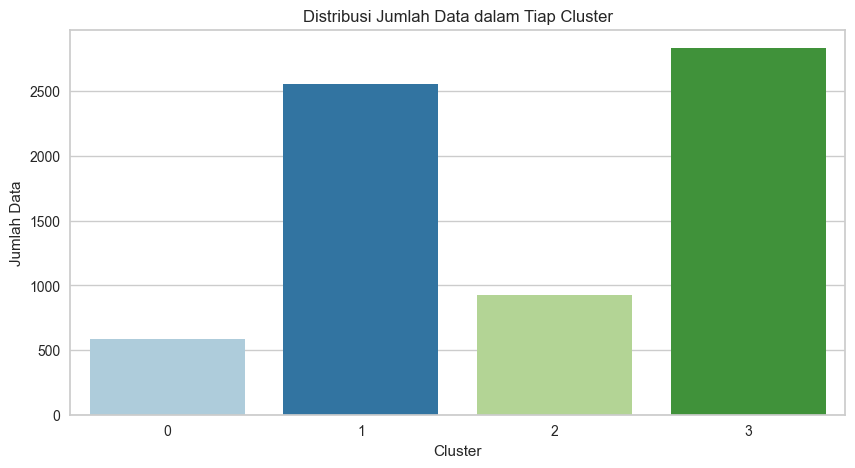

In [652]:
# Hitung jumlah data di tiap cluster
jumlah_cluster = data_selected["Cluster"].value_counts().sort_index()
clusters = jumlah_cluster.index

warna = sns.color_palette("Paired", n_colors=len(clusters))  # Misal pakai palet "Set2"

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=clusters, y=jumlah_cluster, palette=warna)
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data dalam Tiap Cluster")
plt.xticks(np.arange(jumlah_cluster.index.min(), jumlah_cluster.index.max() + 1))  # Sesuaikan ticks
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [653]:

fitur_selected['Cluster'] = labels_kmeans_pca
fitur_selected.sample(5)

C:\Users\User\AppData\Local\Temp\ipykernel_15292\233355617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitur_selected['Cluster'] = labels_kmeans_pca


,mileage,engine,max_power,km_driven,transmission,Cluster
6608,21.38,1396.0,88.70,40000,1,1
4405,20.50,1598.0,103.50,60000,1,1
3902,20.00,1399.0,68.00,54000,1,1
1155,24.00,1186.0,73.97,50000,1,1
2310,20.36,1197.0,78.90,80000,1,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [654]:
print("\n--- Ringkasan Karakteristik Cluster ---")

clusters = sorted(fitur_selected['Cluster'].unique())

for cluster in clusters:
    cluster_data = fitur_selected[fitur_selected['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} data):")

    print(f"  Mileage rata-rata: {cluster_data['mileage'].mean():.2f} km/l (rentang: {cluster_data['mileage'].min():.2f} - {cluster_data['mileage'].max():.2f})")

    print(f"  Kapasitas Mesin rata-rata: {cluster_data['engine'].mean():.0f} cc (rentang: {cluster_data['engine'].min():.0f} - {cluster_data['engine'].max():.0f})")

    print(f"  Daya Maksimum rata-rata: {cluster_data['max_power'].mean():.0f} bhp (rentang: {cluster_data['max_power'].min():.0f} - {cluster_data['max_power'].max():.0f})")

    print(f"  Jarak Tempuh rata-rata: {cluster_data['km_driven'].mean():,.0f} km (rentang: {cluster_data['km_driven'].min():,.0f} - {cluster_data['km_driven'].max():,.0f})")

    top_transmission = cluster_data['transmission'].value_counts().idxmax()
    transmission_pct = (cluster_data['transmission'].value_counts().iloc[0] / len(cluster_data)) * 100
    print(f"  Transmisi Dominan: {top_transmission} ({transmission_pct:.1f}%)")




--- Ringkasan Karakteristik Cluster ---

Cluster 0 (584 data):
  Mileage rata-rata: 17.20 km/l (rentang: 0.00 - 42.00)
  Kapasitas Mesin rata-rata: 1777 cc (rentang: 624 - 3604)
  Daya Maksimum rata-rata: 133 bhp (rentang: 37 - 400)
  Jarak Tempuh rata-rata: 51,178 km (rentang: 1,000 - 230,000)
  Transmisi Dominan: 2 (100.0%)

Cluster 1 (2560 data):
  Mileage rata-rata: 21.97 km/l (rentang: 11.10 - 28.40)
  Kapasitas Mesin rata-rata: 1362 cc (rentang: 793 - 2362)
  Daya Maksimum rata-rata: 85 bhp (rentang: 0 - 198)
  Jarak Tempuh rata-rata: 84,440 km (rentang: 2,000 - 330,000)
  Transmisi Dominan: 1 (100.0%)

Cluster 2 (928 data):
  Mileage rata-rata: 14.29 km/l (rentang: 0.00 - 20.60)
  Kapasitas Mesin rata-rata: 2354 cc (rentang: 1896 - 2982)
  Daya Maksimum rata-rata: 111 bhp (rentang: 52 - 194)
  Jarak Tempuh rata-rata: 109,507 km (rentang: 2,000 - 1,500,000)
  Transmisi Dominan: 1 (100.0%)

Cluster 3 (2834 data):
  Mileage rata-rata: 19.32 km/l (rentang: 0.00 - 33.44)
  Kapasitas

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.


## Cluster 0
- **Mileage:** **17.20 km/l**  
- **Kapasitas Mesin:** **1777 cc**  
- **Daya Maksimum:** **133 bhp**  
- **Jarak Tempuh:** **51,178 km**  
- **Transmisi:** **Otomatis**

**Analisis:** Mobil-mobil dalam cluster ini memiliki keseimbangan antara performa dan efisiensi bahan bakar. Kapasitas mesin cukup besar dan tenaga maksimum yang lumayan tinggi, cocok untuk kebutuhan harian dengan sesekali perjalanan jarak jauh. Konsumsi bahan bakar masih tergolong moderat. Dominasi transmisi otomatis menunjukkan bahwa kenyamanan dalam berkendara tetap menjadi prioritas.

---

## Cluster 1
- **Mileage:** **21.97 km/l**  
- **Kapasitas Mesin:** **1362 cc**  
- **Daya Maksimum:** **85 bhp**  
- **Jarak Tempuh:** **84,440 km**  
- **Transmisi:** **Manual**

**Analisis:** Cluster ini berisi mobil dengan fokus pada efisiensi bahan bakar yang sangat baik. Kapasitas mesin yang lebih kecil dan tenaga yang sedang mendukung penggunaan harian, terutama di area perkotaan. Jarak tempuh rata-rata lebih tinggi, yang mengindikasikan kendaraan ini sudah cukup banyak digunakan. Dominasi transmisi manual juga memperkuat fokus pada efisiensi serta biaya perawatan yang lebih ekonomis.

---

## Cluster 2
- **Mileage:** **14.29 km/l**  
- **Kapasitas Mesin:** **2354 cc**  
- **Daya Maksimum:** **111 bhp**  
- **Jarak Tempuh:** **109,507 km**  
- **Transmisi:** **Manual**

**Analisis:**  Mobil-mobil di cluster ini cenderung memiliki mesin berkapasitas besar, tetapi dengan konsumsi bahan bakar yang relatif boros. Tenaga maksimum tidak terlalu tinggi dibandingkan kapasitas mesin, sehingga kemungkinan kendaraan ini adalah tipe SUV atau kendaraan besar lainnya. Jarak tempuh yang tinggi menunjukkan bahwa kendaraan ini sering digunakan untuk perjalanan jauh atau penggunaan berat. Dominasi transmisi manual menandakan kontrol kendaraan yang lebih maksimal diperlukan.

---

## Cluster 3
- **Mileage:** *(Data tidak disebutkan)*  
- **Kapasitas Mesin:** **1106 cc**  
- **Daya Maksimum:** **72 bhp**  
- **Jarak Tempuh:** **57,646 km**  
- **Transmisi:** **Manual**
- **Analisis:** Mobil dalam cluster ini cenderung memiliki jarak tempuh rendah, yang bisa mengindikasikan bahwa ini adalah kendaraan yang relatif baru atau jarang digunakan. Dengan kapasitas mesin yang lebih kecil dan tenaga yang cukup, kendaraan ini kemungkinan besar adalah mobil perkotaan yang nyaman digunakan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [657]:
fitur_selected.to_csv("Dataset_Klasifikasi.csv", index=False)
print("Hasil clustering telah disimpan.")

Hasil clustering telah disimpan.
